<a href="https://colab.research.google.com/github/vish7715/Customer-Segmentation--Starbucks-Dataset/blob/main/Starbucks_campaign_data_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starbucks Use Case - Rewards Loyalty program

A 1 month campign data from Starbucks simulating its customers activities like how they would do in a rewards app is taken from kaggle .

A total of 3 different types of offers were given to 17000 customers of different genders both male and female having different income and age brackets over a period of 30 days and their responses are being captured.

Total 3 tables namely-

1.Profile.csv - contains data for all 17000 customers within different age groups and income brackets .

2.portfolio.csv - contains data for offer types and the promotional channels used including rewards and  duration.

3.transcript.csv - captures the customer activities bradly divided into 4 event types - offer receieved, offer viewed, offer completed and transaction.

Business Question -

1.To study customer behaviours around different offer types and come up with the most popular types of offers and key factors driving it.

2.Customer segmentation can be done to identify different customer groups and how they react to different offers building up to strategies for catering to customers who are not responding as expected and also for customer stickiness to the ones who are actively responding.



Python programming language and its libraries pandas, matplotlib are used for data cleaning, transformation and visualization.

Load dataset from google drive and read csv files into pandas dataframe

In [2]:
##******* dataset has been imported from Kaggle **********
#import python libraries
import pandas as pd
import numpy as np
import json
import ast
import matplotlib.pyplot as plt

### ************* import data files from Google Drive ************
#load data from gdrive

from google.colab import drive
drive.mount('/content/abc')
## read csv files from gdrive and return pandas dataframe
portfolio_df =pd.read_csv('/content/abc/MyDrive/Starbuckscasestudy/portfolio.csv')
print("read portfolio file::",portfolio_df.head())
profile_df =pd.read_csv('/content/abc/MyDrive/Starbuckscasestudy/profile.csv')
print("read profile file::",profile_df)
transcript_df = pd.read_csv('/content/abc/MyDrive/Starbuckscasestudy/transcript.csv')
print("read transcript file----",transcript_df)

Mounted at /content/abc
read portfolio file::    Unnamed: 0  reward                              channels  difficulty  \
0           0      10         ['email', 'mobile', 'social']          10   
1           1      10  ['web', 'email', 'mobile', 'social']          10   
2           2       0            ['web', 'email', 'mobile']           0   
3           3       5            ['web', 'email', 'mobile']           5   
4           4       5                      ['web', 'email']          20   

   duration     offer_type                                id  
0         7           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1         5           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2         4  informational  3f207df678b143eea3cee63160fa8bed  
3         7           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4        10       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7  
read profile file::        Unnamed: 0 gender  age                                id  \
0               0    NaN  118  68be06c

Data Pre-processing

Cleaning data: Handle missing values, removing unwanted columns,getting the data into right structure to make it suitable for analysis


In [3]:
#drop the unnamed column as it is not needed
portfolio_df = portfolio_df.drop(columns='Unnamed: 0', axis=1, errors='ignore')
print("After drop portfolio::",portfolio_df)
#drop from profile dataframe
profile_df=profile_df.drop(columns='Unnamed: 0',axis=1,errors='ignore')
print("after drop profile::",profile_df)
## drop from transcript dataframe
transcript_df=transcript_df.drop(columns='Unnamed: 0',axis=1,errors='ignore')
print("after transcript drop::",transcript_df)
print(transcript_df[transcript_df['event']=='transaction'])

After drop portfolio::    reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   
5       3  ['web', 'email', 'mobile', 'social']           7         7   
6       2  ['web', 'email', 'mobile', 'social']          10        10   
7       0         ['email', 'mobile', 'social']           0         3   
8       5  ['web', 'email', 'mobile', 'social']           5         5   
9       2            ['web', 'email', 'mobile']          10         7   

      offer_type                                id  
0           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2  information

In [4]:
## Check the shape of dataframe and columns and datatypes
print("Shape of portfolio df::::",portfolio_df.shape)
print("Columns in portfolio df:::",portfolio_df.columns)
print("Data types for portfolio df::",portfolio_df.dtypes)

## check for all dataframes
print("Shape of profile df::::",profile_df.shape)
print("Columns in profile df:::",profile_df.columns)
print("Data types for profile df::",profile_df.dtypes)

print("Shape of transcript df::::",transcript_df.shape)
print("Columns in transcript df:::",transcript_df.columns)
print("Data types for transcript df::",transcript_df.dtypes)

Shape of portfolio df:::: (10, 6)
Columns in portfolio df::: Index(['reward', 'channels', 'difficulty', 'duration', 'offer_type', 'id'], dtype='object')
Data types for portfolio df:: reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object
Shape of profile df:::: (17000, 5)
Columns in profile df::: Index(['gender', 'age', 'id', 'became_member_on', 'income'], dtype='object')
Data types for profile df:: gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object
Shape of transcript df:::: (306534, 4)
Columns in transcript df::: Index(['person', 'event', 'value', 'time'], dtype='object')
Data types for transcript df:: person    object
event     object
value     object
time       int64
dtype: object


In [5]:
## check for missing values
print("Missing values check for portfolio csv::",portfolio_df.isna().sum())
print("Missing value check for profile csv::",profile_df.isna().sum())
print("Missing value check for event table::",transcript_df.isna().sum())
df_missing_cols=['gender','income']
cols=profile_df[df_missing_cols].isna().all(axis=1)
print("columns missing::",cols)
#print("rows missing::",profile_df[cols])

Missing values check for portfolio csv:: reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64
Missing value check for profile csv:: gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64
Missing value check for event table:: person    0
event     0
value     0
time      0
dtype: int64
columns missing:: 0         True
1        False
2         True
3        False
4         True
         ...  
16995    False
16996    False
16997    False
16998    False
16999    False
Length: 17000, dtype: bool


We see that profile table has 2175 missing values in gender column and income column. Since, income is an essential feature for analysis, can not be directly removed from database. we need to further check if these missing values are from same observation.

Need to answer below questions-
Do they belong to the same row?
Are they scattered across multiple rows

In [6]:
## check for same vs different observation
## the rows should have all Nans or None values , if 1 row has only gender as Nan but income not-null and vice versa those rows needs to be separated out

col_gender=profile_df[profile_df['gender'].isna()]
print("separating gender column as a separate table::",col_gender)
col_income=profile_df[profile_df['income'].isna()]
print("separating income column ::",col_income)
#rows_missing = [col_gender,col_income]
#print("missing rows--::",rows_missing)
print("count of gender missing values ::",col_gender['id'].count())
print("count of income missing values",col_income['id'].count())
#print("original df::",profile_df)


separating gender column as a separate table::       gender  age                                id  became_member_on  income
0        NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212     NaN
2        NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712     NaN
4        NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804     NaN
6        NaN  118  8ec6ce2a7e7949b1bf142def7d0e0586          20170925     NaN
7        NaN  118  68617ca6246f4fbc85e91a2a49552598          20171002     NaN
...      ...  ...                               ...               ...     ...
16980    NaN  118  5c686d09ca4d475a8f750f2ba07e0440          20160901     NaN
16982    NaN  118  d9ca82f550ac4ee58b6299cf1e5c824a          20160415     NaN
16989    NaN  118  ca45ee1883624304bac1e4c8a114f045          20180305     NaN
16991    NaN  118  a9a20fa8b5504360beb4e7c8712f8306          20160116     NaN
16994    NaN  118  c02b10e8752c4d8e9b73f918558531f7          20151211     NaN

[2175 rows x 5 c

all 2175 rows have Nan values in both gender and income columns. we can remove these rows

In [7]:
rows_todelete = col_gender['id']
print("Original dataframe shape::",profile_df.shape)
print("IDs to be deleted (first 5)::",rows_todelete.head())

# Filter profile_df to keep only rows where 'id' is NOT in rows_todelete
profile_df = profile_df[~profile_df['id'].isin(rows_todelete)]

print("After dropping rows, profile_df shape::",profile_df.shape)
print("Missing value check for profile csv after dropping::",profile_df.isna().sum())
print("Checking structure after dropping ::",profile_df.dtypes)

Original dataframe shape:: (17000, 5)
IDs to be deleted (first 5):: 0    68be06ca386d4c31939f3a4f0e3dd783
2    38fe809add3b4fcf9315a9694bb96ff5
4    a03223e636434f42ac4c3df47e8bac43
6    8ec6ce2a7e7949b1bf142def7d0e0586
7    68617ca6246f4fbc85e91a2a49552598
Name: id, dtype: object
After dropping rows, profile_df shape:: (14825, 5)
Missing value check for profile csv after dropping:: gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64
Checking structure after dropping :: gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object


After removing null values, we check the data types for columns and see if they are aligned.

In [8]:
#print the FIRST 5  rows to see values and dtypes
print("Head for profile::",profile_df.head())
print("Data types for profile::",profile_df.dtypes)
#s=profile_df['became_member_on']
print("data type for became member on column:::",profile_df['became_member_on'])

Head for profile::    gender  age                                id  became_member_on    income
1       F   55  0610b486422d4921ae7d2bf64640c50b          20170715  112000.0
3       F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509  100000.0
5       M   68  e2127556f4f64592b11af22de27a7932          20180426   70000.0
8       M   65  389bc3fa690240e798340f5a15918d5c          20180209   53000.0
12      M   58  2eeac8d8feae4a8cad5a6af0499a211d          20171111   51000.0
Data types for profile:: gender               object
age                   int64
id                   object
became_member_on      int64
income              float64
dtype: object
data type for became member on column::: 1        20170715
3        20170509
5        20180426
8        20180209
12       20171111
           ...   
16995    20180604
16996    20180713
16997    20170126
16998    20160307
16999    20170722
Name: became_member_on, Length: 14825, dtype: int64


Income and age refelct correct data types as float and int respectively.
became_member_on is int but data is date so we need to change it to datetime.
  gender and id are object dtypes

In [9]:
profile_df['became_member_on']= pd.to_datetime(profile_df['became_member_on'].astype(str))
print("Data type for became member on column:::",profile_df['became_member_on'].dtypes)
print("head again ::::",profile_df.head())

Data type for became member on column::: datetime64[ns]
head again ::::    gender  age                                id became_member_on    income
1       F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15  112000.0
3       F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  100000.0
5       M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   70000.0
8       M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   53000.0
12      M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   51000.0


In [10]:
#check data types for portfolio table
print("Checking dtypes for portfolio",portfolio_df.dtypes)
print("Head for portfolio::",portfolio_df.info)

#checking the first value in the column
channels_0=portfolio_df['channels'][0]
print("Value in channels column is --:",channels_0,"and data type is::",type(channels_0))
offtype_type_value=portfolio_df['offer_type'][0]
print("Value in offer type column is ::",offtype_type_value,"and data type is::",type(offtype_type_value))
print(portfolio_df['id'].value_counts())

Checking dtypes for portfolio reward         int64
channels      object
difficulty     int64
duration       int64
offer_type    object
id            object
dtype: object
Head for portfolio:: <bound method DataFrame.info of    reward                              channels  difficulty  duration  \
0      10         ['email', 'mobile', 'social']          10         7   
1      10  ['web', 'email', 'mobile', 'social']          10         5   
2       0            ['web', 'email', 'mobile']           0         4   
3       5            ['web', 'email', 'mobile']           5         7   
4       5                      ['web', 'email']          20        10   
5       3  ['web', 'email', 'mobile', 'social']           7         7   
6       2  ['web', 'email', 'mobile', 'social']          10        10   
7       0         ['email', 'mobile', 'social']           0         3   
8       5  ['web', 'email', 'mobile', 'social']           5         5   
9       2            ['web', 'email', 'mobile']

In [11]:

## check data types for transcript table
print("head ::",transcript_df.head())
print("Data types::",transcript_df.dtypes)

## check the first value
event_value_0=transcript_df['event'][0]
print("Value ofevent column::",event_value_0,"and data type is::",type(event_value_0))
value_0=transcript_df['value'][0]
print("Value of value column--::",value_0,"and type is ::",type(value_0))
time_0=transcript_df['time'][0]
print("Value in time column::",time_0,"and data type is::",type(time_0))
# value is stored as dictionary with key as 'offer id' and value as value
#offer id is a foreign key in this table and refer to offer id to the actual offer presented to the customer in the portfolio table
# separate dict key and dict value

transcript_df['value']=transcript_df['value'].apply(ast.literal_eval)
print('after literal eval::',transcript_df['value'])
print("Value of value column--::",transcript_df['value'][0],"and type is ::",type(transcript_df['value'][0]))
value_col_normalize = pd.json_normalize(transcript_df['value'])
print("after normalize::",value_col_normalize)

new_transcript_df = pd.concat([transcript_df.drop('value',axis=1),value_col_normalize],axis=1)
print("new dataframe --",new_transcript_df)

#new_transcript_df['offer id']=new_transcript_df['offer id'].combine_first(new_transcript_df['offer_id'])

print("final df::",new_transcript_df.loc[new_transcript_df['event']=='offer completed'])
completed_events = new_transcript_df.loc[new_transcript_df['event']=='offer completed']
print("completed events offer id column--",completed_events['offer id'].isna().sum())
print(completed_events['offer id'].isna().sum())
#print(completed_events['offer_id'].isna().sum())
## offer id is totally Nan , copying offer_id to offer id
completed_events['offer id'] = completed_events['offer_id']
complete_events_afterdrop = completed_events.drop('offer_id',axis=1)
print("completed events df -- ::",complete_events_afterdrop)

received_offers = new_transcript_df.loc[new_transcript_df['event']=='offer received']
# This line caused the error, as 'offer_id' was dropped.
# print("received offers offer_id count",received_offers['offer_id'].isna().sum())
received_offers_afterdrop = received_offers.drop('offer_id',axis=1)
print("received offers df - - :::",received_offers_afterdrop)

viewed_offers = new_transcript_df.loc[new_transcript_df['event']=='offer viewed']
viewed_offers_afterdrop = viewed_offers.drop('offer_id',axis=1)
print("***** - - viewed offers - -  ******",viewed_offers_afterdrop)

transactions_rows=new_transcript_df.loc[new_transcript_df['event']=='transaction']
print("transactions rows::",transactions_rows['offer_id'].isna().sum())
transactions_rows_afterdrop = transactions_rows.drop('offer_id',axis=1)
print("transactions rows after drop::",transactions_rows_afterdrop)

## merge both into 1 dataframe
new_transcript_df = pd.concat([received_offers_afterdrop,viewed_offers_afterdrop,complete_events_afterdrop])
new_transcript_df_cust_seg=pd.concat([received_offers_afterdrop,viewed_offers_afterdrop,complete_events_afterdrop,transactions_rows_afterdrop])
print("see transactions ***",new_transcript_df_cust_seg['offer id'].isna().sum())

print("****** merged transcript events ******",new_transcript_df)
print("view offer in final merge",new_transcript_df[new_transcript_df['event']=='offer viewed'])
print("does transcript table has nulls::",new_transcript_df.isna().sum())
## check for the columns after normalize
# This line caused the error, as 'offer_id' was dropped from the concatenated dataframe.
# print("Check if all values in the offer_id col:::,,",new_transcript_df['offer_id'].isna().all())
print("Check for offer id col::",new_transcript_df['offer id'].isna().all())
print("Check for rewards col::",new_transcript_df['reward'].isna().all())
print("Check for amount col::",new_transcript_df['amount'].isna().all())

## kaggle says time is hours since start of campaign so time is int64 is correct.
#just rename the col to days valid (divide hours by 24)
new_transcript_df['time']=new_transcript_df['time']/24
new_transcript_df=new_transcript_df.rename(columns={'time':'days valid'})
print("updated df--",new_transcript_df)
#print("unique values in event col::",new_transcript_df['event'].value_counts())
#print(new_transcript_df[new_transcript_df['days valid']==5])
#print("is amount null?",new_transcript_df['amount'].isna().sum())
#print(new_transcript_df[new_transcript_df['person']=='4beeb3ed64dd4898b0edf2f6b67426d3'])


head ::                              person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1  a03223e636434f42ac4c3df47e8bac43  offer received   
2  e2127556f4f64592b11af22de27a7932  offer received   
3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0  
Data types:: person    object
event     object
value     object
time       int64
dtype: object
Value ofevent column:: offer received and data type is:: <class 'str'>
Value of value column--:: {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'} and type is :: <class 'str'>
Value in time column:: 0 and da

/tmp/ipython-input-2306939148.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_events['offer id'] = completed_events['offer_id']


transactions rows:: 138953
transactions rows after drop::                                   person        event  time offer id  amount  \
12654   02c083884c7d45b39cc68e1314fec56c  transaction     0      NaN    0.83   
12657   9fa9ae8f57894cc9a3b8a9bbe0fc1b2f  transaction     0      NaN   34.56   
12659   54890f68699049c2a04d415abc25e717  transaction     0      NaN   13.23   
12670   b2f1cd155b864803ad8334cdf13c4bd2  transaction     0      NaN   19.51   
12671   fe97aa22dd3e48c8b143116a8403dd52  transaction     0      NaN   18.97   
...                                  ...          ...   ...      ...     ...   
306529  b3a1272bc9904337b331bf348c3e8c17  transaction   714      NaN    1.59   
306530  68213b08d99a4ae1b0dcb72aebd9aa35  transaction   714      NaN    9.53   
306531  a00058cf10334a308c68e7631c529907  transaction   714      NaN    3.61   
306532  76ddbd6576844afe811f1a3c0fbb5bec  transaction   714      NaN    3.53   
306533  c02b10e8752c4d8e9b73f918558531f7  transaction   714   

In [12]:
# saving a snapshot
customers=profile_df.copy()
offers=portfolio_df.copy()
transactions = new_transcript_df.copy()

Defining Funnel Stages - Based on this dataset there are 4 stages that can be defined

Stage 1 - offer received

Stage 2- offer viewed

Stage 3 - offer completed - an offer is considered completed when its receieved and viewed by customer

Stage 4 - transaction (actual sales)-- actual purchase would be done without offers. (control group)

Count customers at each different stage.

In [13]:
event_count=new_transcript_df.groupby('event')['person'].count().reset_index(name='count')
print(event_count)
view_count = event_count.loc[event_count['event']=='offer viewed','count']
print(view_count)
receive_count=event_count.loc[event_count['event']=='offer received','count']
print(receive_count)


             event  count
0  offer completed  33579
1   offer received  76277
2     offer viewed  57725
2    57725
Name: count, dtype: int64
1    76277
Name: count, dtype: int64


plot the total count on a bar chart

<Figure size 700x500 with 0 Axes>

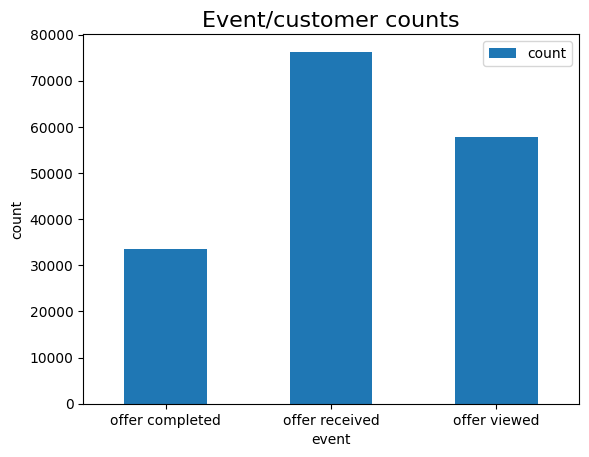

In [14]:
fig = plt.figure(figsize = (7,5))
event_count.plot(kind = 'bar',x='event')
plt.xticks(rotation = None)
plt.ylabel('count')
plt.xlabel('event')
plt.title('Event/customer counts', fontsize = 16)
plt.show()

Insights from above bar Chart -

1. Total transactions have a count of 138953 while offer received has a count of 76277 which means that 62,676 customers still did the sales transaction without ever receiving any offers. These customers form the part of control group that made the transaction and 76277 were the treatment group. 45% Starbucks customers made the purchases without any offers which implies a good customer stickiness.

2. Out of 76,277 customers who received the offers, 76% viewed and 44% completed which is almost half of the customers who received offer they actually viewed and completed.

3.Out of 57725 customers who viewed the offers, >50% ended up completing it .

Merge the offers and customer events table together.

In [15]:
# we will only take events regarding offers, narrowing down to only treatment groups
new_transcript_df=new_transcript_df[~(new_transcript_df['event']=='transaction')]
print("events table without transactions----",new_transcript_df)
print(new_transcript_df[new_transcript_df['event']=='transaction'])

#merge it with offers data
#print offers table shape
print("Shape of offers table--",portfolio_df.columns)
events_and_offers=pd.merge(new_transcript_df,portfolio_df,left_on='offer id',
                           right_on='id').drop('id',axis=1)
print("merged table::",events_and_offers)
#print("print frequency--",events_and_offers['person'].value_counts())
#print(events_and_offers.loc[events_and_offers['person']=='6dd31be298a84bc0801838852bee2fbe'])

## those who completed did they receive the offer?
lst_people_completed = events_and_offers.loc[events_and_offers['event']=='offer completed']['person']
print("offers completed",lst_people_completed)

lst_people_received = events_and_offers.loc[events_and_offers['event']=='offer received']['person']
print("offers received--",lst_people_received)
print("IF those who completed are also the ones who received it ??",set(lst_people_completed).issubset(set(lst_people_received)))
print(new_transcript_df.shape)

events table without transactions----                                   person            event  days valid  \
0       78afa995795e4d85b5d9ceeca43f5fef   offer received        0.00   
1       a03223e636434f42ac4c3df47e8bac43   offer received        0.00   
2       e2127556f4f64592b11af22de27a7932   offer received        0.00   
3       8ec6ce2a7e7949b1bf142def7d0e0586   offer received        0.00   
4       68617ca6246f4fbc85e91a2a49552598   offer received        0.00   
...                                  ...              ...         ...   
306475  0c027f5f34dd4b9eba0a25785c611273  offer completed       29.75   
306497  a6f84f4e976f44508c358cc9aba6d2b3  offer completed       29.75   
306506  b895c57e8cd047a8872ce02aa54759d6  offer completed       29.75   
306509  8431c16f8e1d440880db371a68f82dd0  offer completed       29.75   
306527  24f56b5e1849462093931b164eb803b5  offer completed       29.75   

                                offer id  amount  reward  
0       9b98b8c7a33c4b65b9

Calculate the Overall Completion Rate %.  

Offer completion inclues offer received and offer viewed.

      offer_type            event  count
0           bogo   offer received  30499
1           bogo     offer viewed  25449
2           bogo  offer completed  15669
3       discount   offer received  30543
4       discount     offer viewed  21445
5       discount  offer completed  17910
6  informational   offer received  15235
7  informational     offer viewed  10831
*************
event          offer completed  offer received  offer viewed
offer_type                                                  
bogo                     15669           30499         25449
discount                 17910           30543         21445
informational                0           15235         10831
25449
76277
33.36392359426826


<Figure size 800x900 with 0 Axes>

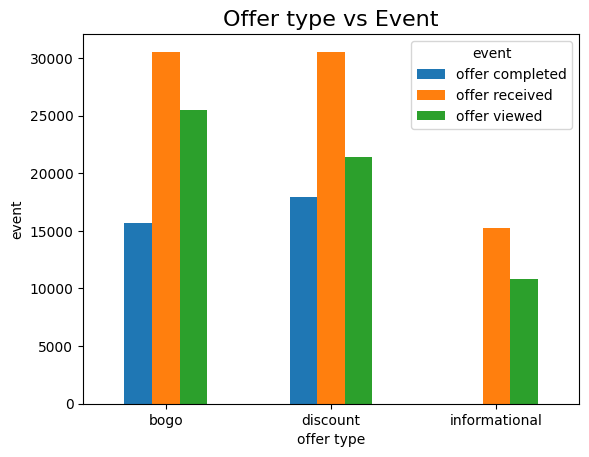

In [16]:
# calculate view rate
offervsevent = events_and_offers.groupby('offer_type')['event'].value_counts().reset_index(name='count')
print(offervsevent)
#build a contingency table
ct = pd.crosstab(events_and_offers['offer_type'],events_and_offers['event'])
print("*************")
print(ct)
view_count = offervsevent.loc[(offervsevent['offer_type']=='bogo') & (offervsevent['event']=='offer viewed')]['count'].sum()
print(view_count)

receive_count=offervsevent.loc[offervsevent['event']=='offer received']['count'].sum()
print(receive_count)

view_ratio = (view_count/receive_count)*100
print(view_ratio)
#calculate completion rate


## plot for each offer_type
fig = plt.figure(figsize = (8,9))
ct.plot(kind='bar',stacked=False)
plt.xticks(rotation = None)
plt.ylabel('event')
plt.xlabel('offer type')
plt.title('Offer type vs Event', fontsize = 16)
plt.show()


1. The most completed offer type is Dicount offer type
2. The most viewed offer type is bogo although both bogo and discount are the most received offers implying discounts are customers favourite types of offers.


(167581, 6)
51.375454932948614
58.63864060504862
70.21248731296859
[np.float64(58.63864060504862), np.float64(70.21248731296859), np.float64(51.375454932948614), np.float64(83.44208006819895)]


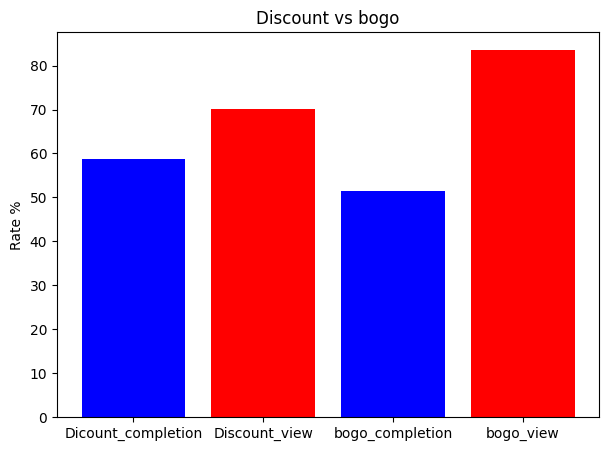

In [17]:

print(new_transcript_df.shape)
#completion rate % vs view rate % of bogo vs discount
bogo_complete_count= ct.loc['bogo','offer completed']
bogo_view = ct.loc['bogo','offer viewed']
bogo_receive_count = ct.loc['bogo','offer received']
print((bogo_complete_count/bogo_receive_count)*100)
ct.bogo_complete_rate = (bogo_complete_count/bogo_receive_count)*100
ct.bogo_view_rate = (bogo_view/bogo_receive_count)*100

discount_complete_count= ct.loc['discount','offer completed']
discount_view = ct.loc['discount','offer viewed']
discount_receive_count = ct.loc['discount','offer received']
print((discount_complete_count/discount_receive_count)*100)
ct.discount_complete_rate = (discount_complete_count/discount_receive_count)*100
ct.discount_view_rate = (discount_view/discount_receive_count)*100
print(ct.discount_view_rate)




## put the mesaures in a list
measures = ['Dicount_completion','Discount_view','bogo_completion','bogo_view']
Values=[ct.discount_complete_rate,ct.discount_view_rate,ct.bogo_complete_rate,ct.bogo_view_rate]
print(Values)
# Display the plot
plt.figure(figsize=(7,5))
plt.bar(measures, Values, color=['blue', 'red'])
plt.ylabel('Rate %')
plt.title('Discount vs bogo')
plt.show()


Insights- The difference between view rate and completion rate of bogo is comparatively high than that of discount. it means that customers viewed the Bogo offers as they receive it but choose not to complete , implying data can be further analysed based on difficulty,rewards and channels to understand the drivers affecting it.

Customer Segmentation.

Steps-

1.Prepare customer behaviour features using  data from transactions csv including-

** Number of offers received per customer

** Number of offers viewed per customers

** number of offers completed per customers

** money spent per customers

** demographic data for each customer

In [18]:
print(new_transcript_df_cust_seg.shape)

##remove data where person id does not have gender or income
new_transcript_df_cust_seg_filtered=new_transcript_df_cust_seg[~new_transcript_df_cust_seg['person'].isin(rows_todelete)].reset_index(drop=True)
#print("****** After deletion ******",new_transcript_df_cust_seg_filtered)
new_transcript_df_cust_seg_filtered.groupby(['person','event']).count()

new_transcript_df_cust_seg_grouped=new_transcript_df_cust_seg_filtered.groupby(['person','event']).count()
print("****** ****** ****** ***** *****")
print(new_transcript_df_cust_seg_grouped)

#create a new dataframe
cust_features = pd.DataFrame(columns=['person','received','viewed','completed','transactions_done','money_spent'])
cust_features['person'] = new_transcript_df_cust_seg_filtered['person'].value_counts().sort_index().index.values
#print(cust_features['person'])
cust_features.set_index('person',inplace=True)

# Initialize columns to 0 to easily add counts and sums
cust_features['received'] = 0
cust_features['viewed'] = 0
cust_features['completed'] = 0
cust_features['transactions_done']=0
cust_features['money_spent'] = 0.0 # Initialize with float for amount


### testing #####
data=[['A','A','B','B','C','C'],['yes','no','yes','no','yes','no']]
e_df=pd.DataFrame(columns=['person','status'])
e_df['person']=data[0]
e_df['status']=data[1]
print(e_df)
print(e_df.groupby('person')['status'].count())
#### end testing #####
# Calculate money_spent for each person for transactions before the loop
money_spent_by_person = new_transcript_df_cust_seg_filtered[
    new_transcript_df_cust_seg_filtered['event'] == 'transaction'
].groupby('person')['amount'].sum()
print(money_spent_by_person)
print("************")
#print(cust_features)
#print(new_transcript_df_cust_seg_grouped.index)
## populate the received,viewed and completed columns
for i in cust_features.index.to_list():
  # Offers received
  if (i,'offer received') in new_transcript_df_cust_seg_grouped.index:
    cust_features.loc[i,'received'] = new_transcript_df_cust_seg_grouped.loc[(i,'offer received'), 'offer id'].sum()
    #print("****** received ******",cust_features.head())

  #offers viewed
  if (i,'offer viewed') in new_transcript_df_cust_seg_grouped.index:
    cust_features.loc[i,'viewed'] = new_transcript_df_cust_seg_grouped.loc[(i,'offer viewed'), 'offer id'].sum()

  #offers completed
  if (i,'offer completed') in new_transcript_df_cust_seg_grouped.index:
    cust_features.loc[i,'completed'] = new_transcript_df_cust_seg_grouped.loc[(i,'offer completed'), 'offer id'].sum()
  # transactions done
  if(i,'transaction') in new_transcript_df_cust_seg_grouped.index:
    cust_features.loc[i,'transactions_done']=new_transcript_df_cust_seg_grouped.loc[(i,'transaction'), 'amount'].sum()
    # money spent (sum of amounts for transactions for person i)
    if i in money_spent_by_person.index:
        cust_features.loc[i,'money_spent'] = money_spent_by_person.loc[i]

print("**** head for customer feature dataset***",cust_features)
cust_features.isna().sum()

(306534, 6)
****** ****** ****** ***** *****
                                                  time  offer id  amount  \
person                           event                                     
0009655768c64bdeb2e877511632db8f offer completed     3         3       0   
                                 offer received      5         5       0   
                                 offer viewed        4         4       0   
                                 transaction         8         0       8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed     3         3       0   
...                                                ...       ...     ...   
fffad4f4828548d1b5583907f2e9906b transaction        12         0      12   
ffff82501cea40309d5fdd7edcca4a07 offer completed     6         6       0   
                                 offer received      6         6       0   
                                 offer viewed        6         6       0   
                                 transactio

,0
received,0
viewed,0
completed,0
transactions_done,0
money_spent,0


Apply K means clustering for segmentation

1. Find optimal K using Elbow method
2. Fit the scaled features with kmeans and get cluster labels
3. Validate using silhouette score
4. Calculate cluster means
5. Calculate overall mean
6. Find relative performance

[[ 0.49312782  0.5129349  -0.06972496  0.08134652]
 [ 1.2675579   0.5129349  -0.64859698 -0.28907335]
 [-0.28130226  0.5129349  -0.06972496  0.61427714]
 ...
 [-1.05573234 -1.38323164 -0.64859698 -0.80699942]
 [ 0.49312782  0.5129349   0.70210441 -0.21697459]
 [ 2.04198798  2.40910144  1.28097644  0.83903751]]
wcss:: [59300.00000000014]
wcss:: [59300.00000000014, 38543.475503155336]
wcss:: [59300.00000000014, 38543.475503155336, 33155.67150897128]
wcss:: [59300.00000000014, 38543.475503155336, 33155.67150897128, 28217.510814861347]
wcss:: [59300.00000000014, 38543.475503155336, 33155.67150897128, 28217.510814861347, 22975.715731252254]
wcss:: [59300.00000000014, 38543.475503155336, 33155.67150897128, 28217.510814861347, 22975.715731252254, 19868.8624661837]
wcss:: [59300.00000000014, 38543.475503155336, 33155.67150897128, 28217.510814861347, 22975.715731252254, 19868.8624661837, 17578.140077895503]
wcss:: [59300.00000000014, 38543.475503155336, 33155.67150897128, 28217.510814861347, 22

/tmp/ipython-input-632843635.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(k_values, wcss, 'bo-', color='black') # Changed kmeans to k_values


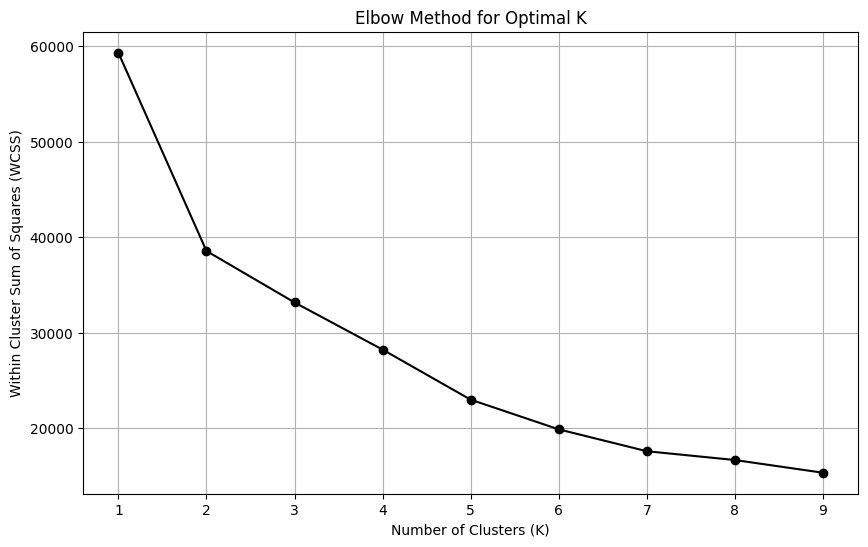

In [19]:
## import libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## feature selection
cust_behaviour_scaled=cust_features.iloc[:,[1,2,3,4]]
##print("ttt",cust_behaviour_scaled)
## feature scaling
sc= StandardScaler()
cust_behaviour_scaled=sc.fit_transform(cust_behaviour_scaled) # Changed X to cust_behaviour_scaled
print(cust_behaviour_scaled)


## determine the number of clusters k with Elbow method
wcss=[]     ## within cluster sum of squares
max_clusters=10
k_values = range(1,max_clusters) # Store k values for plotting
for k in k_values:
  kmeans=KMeans(n_clusters=k,random_state=42, n_init='auto') # Added n_init='auto' to suppress warning
  kmeans.fit(cust_behaviour_scaled)
#calculate wcss for Elbow method
  wcss.append(kmeans.inertia_)
  print("wcss::",wcss)

## plot the k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, 'bo-', color='black') # Changed kmeans to k_values
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

Interpreting the graph-

At K=5, the wcss stops decreasing at an increasing rate. Hence, optimal number of cluster K=5 can be chosen.

In [23]:
k=5
kmeans= KMeans(n_clusters=k,random_state=42)
cluster_labels = kmeans.fit_predict(cust_behaviour_scaled)
cust_features['cluster_label'] = cluster_labels
print(cust_features)

## validating the clustering quality using Silhouette score
score_value=silhouette_score(cust_behaviour_scaled,cluster_labels)
print(score_value)

#silhouette_score value at 0.26 is a reasonable clustering with K at value 5.

#mean by cluster
cluster_mean=cust_features[['viewed','transactions_done','completed','money_spent']].groupby(cluster_labels).mean()
print("mean of cluster labels---",cluster_mean)

#overall mean
overall_mean=cust_features[['viewed','transactions_done','completed','money_spent']].mean()
print("overall mean---",overall_mean)

relative_performance = ((cluster_mean / overall_mean)-1)
print("cluster perf vs overall population",relative_performance.round(1))

ranking=relative_performance.sum(axis=1).sort_values(ascending=False).index.values
relative_performance=relative_performance.reindex(ranking)
print("ranking",relative_performance)

#get the cluster means for cust_features
clusters_mean_all=cust_features.groupby(cluster_labels).mean()
relative_performance_all = ((clusters_mean_all / overall_mean)-1)
ranking_all=relative_performance_all.sum(axis=1).sort_values(ascending=False).index.values
clusters_mean_all.reindex(ranking_all)
print(clusters_mean_all)


                                  received  viewed  completed  \
person                                                          
0009655768c64bdeb2e877511632db8f         5       4          3   
0011e0d4e6b944f998e987f904e8c1e5         5       5          3   
0020c2b971eb4e9188eac86d93036a77         5       3          3   
0020ccbbb6d84e358d3414a3ff76cffd         4       4          3   
003d66b6608740288d6cc97a6903f4f0         5       4          3   
...                                    ...     ...        ...   
fff3ba4757bd42088c044ca26d73817a         6       3          3   
fff7576017104bcc8677a8d63322b5e1         5       4          3   
fff8957ea8b240a6b5e634b6ee8eafcf         3       2          0   
fffad4f4828548d1b5583907f2e9906b         4       4          3   
ffff82501cea40309d5fdd7edcca4a07         6       6          6   

                                  transactions_done  money_spent  \
person                                                             
0009655768c64bdeb2

In [29]:
#summarize clusters

cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate'])
cluster_summary['cluster']=np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)
print(cluster_summary)

cluster_summary['frequency'] = clusters_mean_all['transactions_done'].round(1)
cluster_summary['avg_purchase_value'] = (clusters_mean_all['money_spent'] / clusters_mean_all['transactions_done']).round(1)
cluster_summary['offer_complete_rate'] = (clusters_mean_all['completed'] / clusters_mean_all['received']).round(2)
cluster_summary.reindex(ranking_all)
print(cluster_summary)

        frequency avg_purchase_value offer_complete_rate
cluster                                                 
0             NaN                NaN                 NaN
1             NaN                NaN                 NaN
2             NaN                NaN                 NaN
3             NaN                NaN                 NaN
4             NaN                NaN                 NaN
         frequency  avg_purchase_value  offer_complete_rate
cluster                                                    
0              4.7                10.5                 0.25
1              9.7                18.9                 0.78
2             16.6                 7.1                 0.52
3             10.8                72.5                 0.74
4              5.7                11.0                 0.31


Customer clusters-

Insights

Exception- Cluster 3 has surprisingly high average purchase value as we did not remove the outliers from the money_spent column.


1. Cluster 1 - Most Valuable Customers - Highest offer completion rate which implies that this customer cluster viewed and completed the most offers.Highly responsive to offers and also the highest Average purchase value(apv) spent the most amount of money.

2. Cluster 2 - Regular Customers - They have highest frequency making the most number of transactions during the campaign month . Although, they have offer completion rate at 0.52 which is the average . They have low APV dusring the campaign window, which means campaigns dont affect their buying behaviour , they are regularly buying.


Recommendations -

1. For Cluster 1 - Management should keep them as they are driving the highest sales during campign.

2. For Cluster 2 - Company should expose high end products to them at low cost as they are regular customers or increase products baskets(if they are buying some product regularly , should give them related products too) with them to increase stickiness.